<a href="https://colab.research.google.com/github/siddhantsangwan/predicting_salary/blob/master/tab_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   322  100   322    0     0    958      0 --:--:-- --:--:-- --:--:--   955
Updating fastai...
Done.


In [ ]:
from fastai.tabular import *

In [ ]:
path = untar_data(URLs.ADULT_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/adult_sample/export.pkl'),
 PosixPath('/root/.fastai/data/adult_sample/models'),
 PosixPath('/root/.fastai/data/adult_sample/adult.csv')]

In [ ]:
Path(path/'models').ls()

[PosixPath('/root/.fastai/data/adult_sample/models/mini_train.pth')]

In [ ]:
df = pd.read_csv(path/'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [ ]:
dep_var = 'salary'
category_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
continuous_names = ['age', 'fnlwgt', 'education-num']
procs = [FillMissing, Categorify, Normalize]  # preprocess

In [ ]:
# help(TabularList)

In [ ]:
df.shape[0]

32561

In [ ]:
df['education']
test = TabularList.from_df(df.iloc[800:1000].copy(), path=path, cat_names=category_names, cont_names=continuous_names)

In [ ]:
data = (TabularList.from_df(df, cat_names=category_names, cont_names=continuous_names, procs=procs)
.split_by_idx(list(range(800,1000)))  # split contiguous values into valid set
.label_from_df(cols=dep_var)  # salary is the dependent(target) variable
.add_test(test)
.databunch()) # make a databunch with the dataloaders

In [ ]:
data.show_batch()

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,False,-0.7027,-0.1088,-0.4224,<50k
Private,Some-college,Never-married,Tech-support,Own-child,White,False,-0.9959,0.5301,-0.0312,<50k
Private,11th,Never-married,Handlers-cleaners,Not-in-family,White,False,-1.3624,0.4664,-1.2046,<50k
Private,Masters,Widowed,Exec-managerial,Not-in-family,White,True,1.4962,-0.8589,-0.0312,>=50k
Private,Some-college,Married-civ-spouse,Sales,Husband,White,False,1.5695,-0.8876,-0.0312,>=50k


In [ ]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


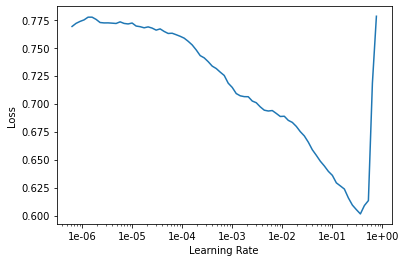

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit(4, (1e-1)/6)

epoch,train_loss,valid_loss,accuracy,time
0,0.364105,0.386026,0.820000,00:07
1,0.360392,0.370097,0.840000,00:07
2,0.361335,0.389188,0.830000,00:07
3,0.360155,0.360466,0.865000,00:07


In [26]:
learn.save('tab_learner')

In [ ]:
learn2 = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [ ]:
learn2.fit_one_cycle(4, (1e-1)/6)

epoch,train_loss,valid_loss,accuracy,time
0,0.388008,0.388982,0.810000,00:08
1,0.369352,0.381819,0.850000,00:08
2,0.365527,0.382507,0.835000,00:08
3,0.354738,0.384761,0.835000,00:08


In [ ]:
# learn2.fit_one_cycle(3, (1e-1)/8)

In [ ]:
learn2.save('tab_learn_cyclic')

In [ ]:
df.iloc[0]

age                                49
workclass                     Private
fnlwgt                         101320
education                  Assoc-acdm
education-num                      12
marital-status     Married-civ-spouse
occupation                        NaN
relationship                     Wife
race                            White
sex                            Female
capital-gain                        0
capital-loss                     1902
hours-per-week                     40
native-country          United-States
salary                          >=50k
Name: 0, dtype: object

In [28]:
row = df.iloc[0]
learn.load('tab_learner')
learn.predict(row)

(Category tensor(1), tensor(1), tensor([0.4047, 0.5953]))

In [ ]:
help(learn.show_results)

Help on method show_results in module fastai.basic_train:

show_results(ds_type=<DatasetType.Valid: 2>, rows:int=5, **kwargs) method of fastai.basic_train.Learner instance
    Show `rows` result of predictions on `ds_type` dataset.



In [ ]:
learn.show_results()

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target,prediction
Private,Some-college,Divorced,Handlers-cleaners,Unmarried,White,True,0.4701,-0.8793,-0.0312,<50k,<50k
Self-emp-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,True,0.5434,0.0290,-0.0312,>=50k,>=50k
Private,Assoc-voc,Divorced,#na#,Not-in-family,White,True,-0.1896,1.7704,-0.0312,<50k,<50k
Federal-gov,Bachelors,Never-married,Tech-support,Not-in-family,White,True,-0.9959,-1.3242,-0.0312,<50k,<50k
Private,Bachelors,Married-civ-spouse,#na#,Husband,White,True,-0.1163,-0.2389,-0.0312,<50k,<50k


In [25]:
help(learn.save)

Help on method save in module fastai.basic_train:

save(file:Union[pathlib.Path, str, _io.BufferedWriter, _io.BytesIO]=None, return_path:bool=False, with_opt:bool=True) method of fastai.basic_train.Learner instance
    Save model and optimizer state (if `with_opt`) with `file` to `self.model_dir`. `file` can be file-like (file or buffer)

